<a href="https://colab.research.google.com/github/jerrytigerxu/American-Ninja-Warrior-Project/blob/master/American_Ninja_Warrior_Obstacle_Course_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Now that you are here, you are about to witness a succinct and effective cleaning of the data regarding the history of obstacles of the ten seasons of American Ninja Warrior. There will also be some cool analysis to top it off.

# It's really cool, I know.

---








### I remember watching the original Ninja Warrior that aired in Japan when I was younger. Both the original and the American version are great showcases of the capacity of human athleticism and also great showcases of my current non-so-athletic ability. But who knows, I'm only a junior in college (as of 4/12/2019), anything can happen!

I downloaded the file "American Ninja Warrior Obstacle History.xlsx" from the Data.World (https://data.world/ninja/anw-obstacle-history). If you choose to follow along, the file is right there for the taking.


Because I use Google Colab instead of Jupyter notebook, I could just save the relevant files into my Google Drive and then mount them onto Colab, allowing me to access them without needing to save to my local machine. 

The next few lines are specific to my workflow and are not necessary for everyone to emulate.

In [0]:
from google.colab import files

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd

It is necessary to import these libraries, as they are pretty much ubiqituous to all data science workflows.

In [0]:
filePath = '/content/gdrive/My Drive/Google Colaboratory/Files for Google Colab/American Ninja Warrior Project'
amwDat = pd.read_csv(filePath +'/amw.csv', error_bad_lines=False)

b'Skipping line 891: expected 5 fields, saw 6\nSkipping line 892: expected 5 fields, saw 6\nSkipping line 893: expected 5 fields, saw 6\nSkipping line 894: expected 5 fields, saw 6\nSkipping line 895: expected 5 fields, saw 6\nSkipping line 896: expected 5 fields, saw 6\nSkipping line 897: expected 5 fields, saw 6\nSkipping line 898: expected 5 fields, saw 6\nSkipping line 899: expected 5 fields, saw 6\nSkipping line 900: expected 5 fields, saw 6\nSkipping line 901: expected 5 fields, saw 6\nSkipping line 902: expected 5 fields, saw 6\nSkipping line 903: expected 5 fields, saw 6\nSkipping line 904: expected 5 fields, saw 6\nSkipping line 905: expected 5 fields, saw 6\n'


In [0]:
amwDat.head()

,Season,Location,Round/Stage,Obstacle Name,Obstacle Order
0,1,Venice,Qualifying,Quintuple Steps,1
1,1,Venice,Qualifying,Rope Swing,2
2,1,Venice,Qualifying,Rolling Barrel,3
3,1,Venice,Qualifying,Jumping Spider,4
4,1,Venice,Qualifying,Pipe Slider,5


With the head() function, I get a general idea of what the data is like. This dataset in particular is quite small and not representative of the super crazy huge sets that most businesses work with. 

### I can see that there are five variables (or features): Season, Location, Round/Stage, Obstacle Name, Obstacle Order.

## Let's dig a little deeper.

In [0]:
amwDat.describe()

,Season,Obstacle Order
count,889.000000,889.000000
mean,6.422947,4.577053
std,2.573901,2.583509
min,1.000000,1.000000
25%,4.000000,2.000000
50%,7.000000,4.000000
75%,9.000000,6.000000
max,10.000000,10.000000


In [0]:
amwDat['Season'] = amwDat['Season'].astype('int')
amwDat['Obstacle Order'] = amwDat['Obstacle Order'].astype('int')

Here, we can convert the columns Season and Obstacle into integer vectors

In [0]:
amwDat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 5 columns):
Season            889 non-null int64
Location          889 non-null object
Round/Stage       889 non-null object
Obstacle Name     889 non-null object
Obstacle Order    889 non-null int64
dtypes: int64(2), object(3)
memory usage: 34.8+ KB


What we have here is a dataframe with five columns, each with 889 entries. Two of the columns, season and obstacle order, are integer vectors, and three of the columns, location, round/stage, and obstacle name, are object vectors.

## Let's take a look at the unique values in each column

In [0]:
colNames = list(amwDat)
for col in colNames:
  print(col)
  print(amwDat[col].unique())
  print('\n')

Season
[ 1  2  3  4  5  6  7  8  9 10]


Location
['Venice' 'Sasuke 23 (Japan)' 'Sasuke 26 (Japan)' 'Sasuke 27 (Japan)'
 'Southwest' 'Midwest' 'Northeast' 'Northwest' 'Mid-South' 'Southeast'
 'Las Vegas' 'Baltimore' 'Miami' 'Denver' 'Dallas' 'St. Louis'
 'Pittsburgh' 'Orlando' 'Kansas City' 'Houston' 'San Pedro (Military)'
 'Los Angeles' 'Atlanta' 'Indianapolis' 'Oklahoma City' 'Philadelphia'
 'San Antonio' 'Daytona Beach' 'Cleveland' 'Minneapolis']


Round/Stage
['Qualifying' 'Semi-Finals' 'National Finals - Stage 1'
 'National Finals - Stage 2' 'National Finals - Stage 3'
 'National Finals - Stage 4' 'Qualifying (Regional/City)'
 'Finals (Regional/City)']


Obstacle Name
['Quintuple Steps' 'Rope Swing' 'Rolling Barrel' 'Jumping Spider'
 'Pipe Slider' 'Warped Wall' 'Tarzan Swing' 'Jumping Bars' 'Cargo Climb'
 'Twelve Timbers' 'Curtain Slider' 'Log Grip' 'Half-Pipe Attack'
 'Slider Jump' 'Tarzan Rope' 'Rope Ladder' 'Downhill Jump' 'Salmon Ladder'
 'Stick Slider' 'Unstable Bridge' 'Meta

### Before I visualize the data to get a (literal) picture of the data, I'm going to do some indexing to play around.

In [0]:
amwDat.loc[(amwDat['Obstacle Name'] != 'Rope Swing') & (amwDat['Round/Stage'] == 'Qualifying') & (amwDat['Obstacle Order'] < 5)]

,Season,Location,Round/Stage,Obstacle Name,Obstacle Order
0,1,Venice,Qualifying,Quintuple Steps,1
2,1,Venice,Qualifying,Rolling Barrel,3
3,1,Venice,Qualifying,Jumping Spider,4
40,2,Venice,Qualifying,Quad Steps,1
42,2,Venice,Qualifying,Bridge of Blades,3
43,2,Venice,Qualifying,Jumping Spider,4
78,3,Venice,Qualifying,Quad Steps,1
79,3,Venice,Qualifying,Log Grip,2
80,3,Venice,Qualifying,Bridge of Blades,3
81,3,Venice,Qualifying,Jump Hang,4


This is a very random random of indexing, but I found it interesting. Notice how after I've limited Obstacle Name to everything but 'Rope Swing', Round/Stage to 'Qualifying', and making Obstacle Order less than 5, there are only 10 entries left.

## I need to also check for any missing values in the data, because those dudes can be very pesky.

In [0]:
def num_missing(x):
  return(sum(x.isnull()))

# This function will help check each column in the dataframe to see if there are any missing values

amwDat.apply(num_missing, axis=0)

Season            0
Location          0
Round/Stage       0
Obstacle Name     0
Obstacle Order    0
dtype: int64

Awesome! Every single column has zero missing values! This makes our job much easier!

In [0]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Time to do some visualizations!

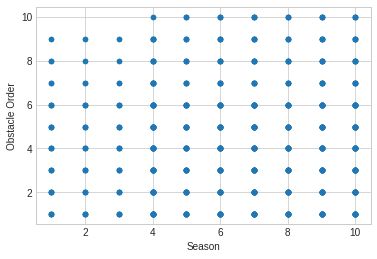

In [0]:
amwDat.plot.scatter(x='Season', y='Obstacle Order')

## It only takes a few seconds to really just how silly this visualization is. Most of the data in this set is categorical and not numerical, and even those with numeric values are really just ordinal  data, meaning that they have a scale of low to high, but besides that, they don't have much numeric value.

# Now let's see which values appear most often for each column.

In [0]:
for column in colNames:
  print(column)
  print(amwDat[column].mode())
  print('\n')

Season
0     7
1     9
2    10
dtype: int64


Location
0    Las Vegas
dtype: object


Round/Stage
0    Finals (Regional/City)
dtype: object


Obstacle Name
0    Warped Wall
dtype: object


Obstacle Order
0    1
dtype: int64




## From this we can see that the most common location in the dataset is Las Vegas, the most common round/stage listed in the dataset is the regional/city finals, and the most common obstacle is the warped wall.